In [ ]:
!pip3 install -q U datasets
!pip3 install -q U bitsandbytes


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
model_id=

In [ ]:
from PIL import Image

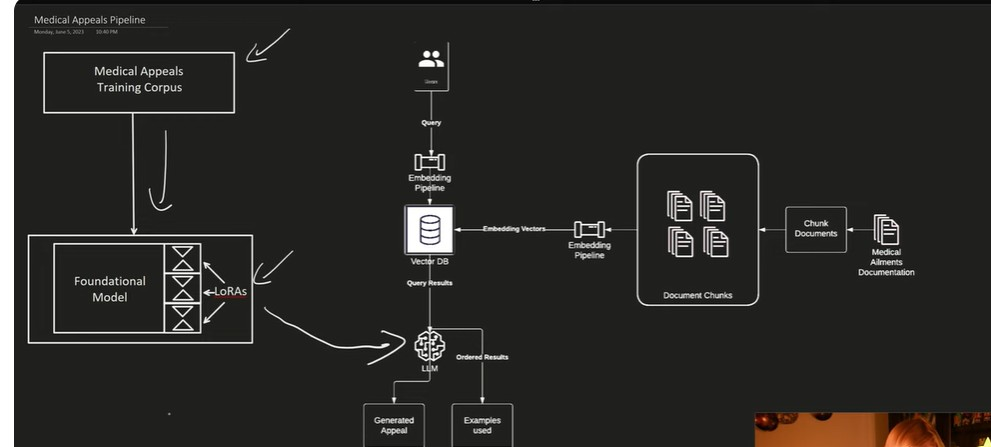

In [ ]:
Image.open(r'/content/Finetuning_multiple_source.jpg')

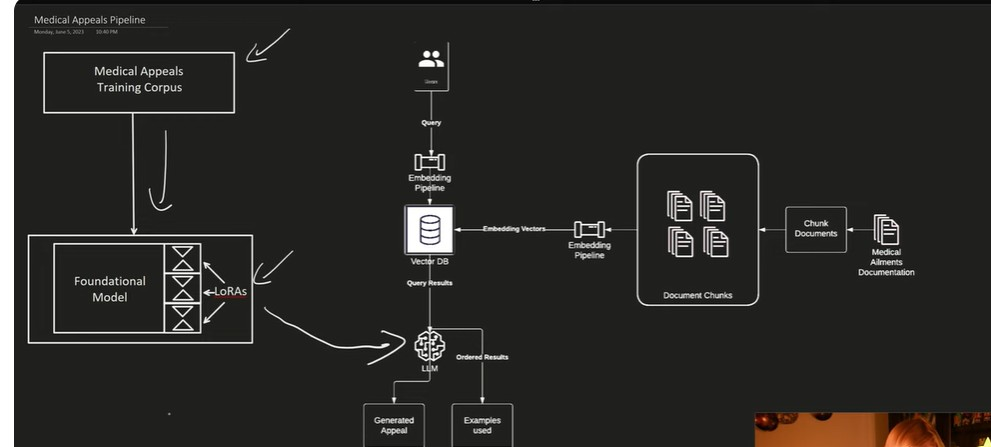

In [ ]:
Image.open(r'/content/Finetuning_multiple_source_1.jpg')

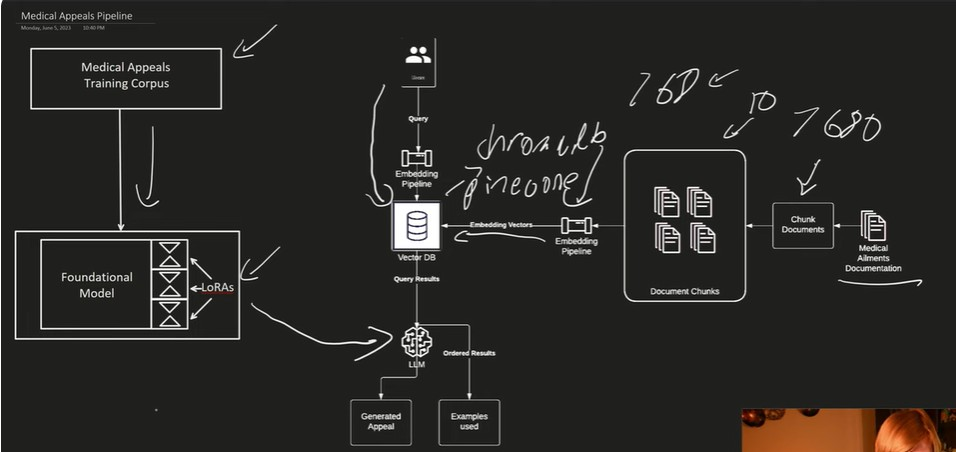

In [ ]:
Image.open(r'/content/Finetuning_multiple_source_2.jpg')

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
model_id="Ele"
bnb_config=BitsAndBytesConfig(load_in_4bit=True,bnb_4bit_use_double_quant=True,bnb_4bit_quant_type="nf4",bnb_4bit_compute_dtype=torch.bfloat16)
model=AutoModelForCausalLM.from_pretrained(model_id,quantization_config=bnb_config,device_map="auto")
tokenizer=AutoTokenizer.from_pretrained(model_id)
model=AutoModelForCausalLM.from_pretrained(model_id,quantization_config=bnb_config,device_map="auto")
tokenizer=AutoTokenizer.from_pretrained(model_id,quantization_config=bnb_config,device_map="auto")


In [ ]:
from peft import prepare_model_for_kbit_training
model.gradient_checkpointing_enable()
model=prepare_model_for_kbit_training(model)

In [ ]:
from peft.tuners import trainable_tokens
def print_trainable_parameters():
  trainable_params=0
  all_param=0
  for _,param in model.named_parameters():
    all_param+=param.numel()
    if param.requires_grad:
      trainable_params+=param.numel()
      print(f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100*trainable_params/all_param}")

In [ ]:
from peft import lora_config,get_peft_model
config=LoraConfig(r=8,lora_alpha=32,target_modules=["query_key_value"],lora_dropout=0.05,bias="none",task_type="CAUSAL_LM")
model=get_peft_model(model,config)


In [ ]:
from datasets import load_dataset
data=load_dataset("Abirate/english-quotes")
data=data.map(lambda samples:tokenizer(samples["text"],truncation=True),batched=True)


In [ ]:
import pandas as pd
df=pd.DataFrame("I love Machine Leanring","I love AI"],authors:{"Author1",,"Author2","Author3"},tag:{"AI","ML"})
data=data.map(lambda samples:tokenizer(samples["text"],truncation=True),batched=True)
dataset_dict2=DatasetDict({"train":dataset2})
print(dataset_dict2)

In [ ]:
import transformers
tokenizer.pad_tokens=transformer.Trainer(model=model,train_dataset=data["train"],eval_dataset=data["test"],data_collator=transformers.DataCollatorForLanguageModeling(tokenizer,mlm=False))
device="cuda:0"
inputs=tokenizer(text,return_tensor="pt")
model.config.use_cache=False
trainer.train()
outputs=model.generate(**inputs,max_new_tokens=20)
print(tokenizer.decode(outputs[0],skip_specail_tokens=True))



